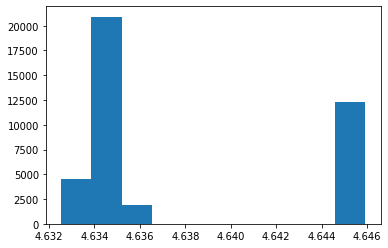

In [1]:
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, RandomizedSearchCV# train/test
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler, StandardScaler, RobustScaler, Normalizer
import pandas as pd
import random
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import lightgbm as lgb
from sklearn.multioutput import MultiOutputRegressor

train_df = pd.read_csv('./open/train.csv')

train_x = train_df.filter(regex='X') # Input : X Featrue
train_y = train_df.filter(regex='Y') # Output : Y Feature
x_test = pd.read_csv('./open/test.csv').drop(columns=['ID'])

train_x = train_x.drop(columns=['X_04', 'X_23', 'X_47', 'X_48'])
x_test = x_test.drop(columns=['X_04', 'X_23', 'X_47', 'X_48'])
train_x = train_x.drop([24093])
train_y = train_y.drop([24093])
train_x['X_10'] = train_x['X_10'].replace(0, 3.0)
train_x['X_11'] = train_x['X_11'].replace(0, 0.5)

x_test['X_10'] = x_test['X_10'].replace(0, 3.0)
x_test['X_11'] = x_test['X_11'].replace(0, 0.5)

train_x['X_05'].mean(), train_x['X_05'].max(), train_x['X_05'].min(),
plt.hist(np.log1p(train_x['X_05']))
plt.show()

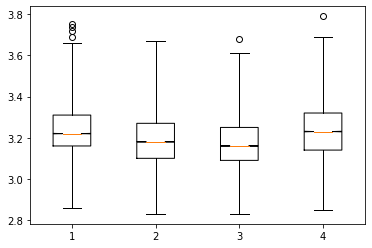

[array([3.16, 2.86]),
 array([3.31, 3.66]),
 array([3.1 , 2.83]),
 array([3.27, 3.67]),
 array([3.09, 2.83]),
 array([3.25, 3.61]),
 array([3.14, 2.85]),
 array([3.32, 3.69])]

In [2]:
box = plt.boxplot([train_x['X_19'], train_x['X_20'], train_x['X_21'], train_x['X_22']], notch=True, whis=2.5)
plt.show()
whiskers = [item.get_ydata() for item in box['whiskers']]
whiskers

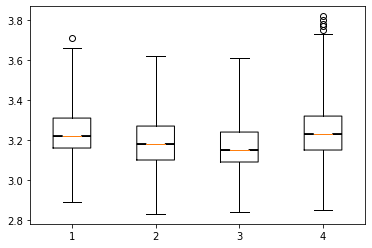

[array([3.16, 2.89]),
 array([3.31, 3.66]),
 array([3.1 , 2.83]),
 array([3.27, 3.62]),
 array([3.09, 2.84]),
 array([3.24, 3.61]),
 array([3.15, 2.85]),
 array([3.32, 3.73])]

In [3]:
box = plt.boxplot([x_test['X_19'], x_test['X_20'], x_test['X_21'], x_test['X_22']], notch=True, whis=2.5)
plt.show()
whiskers = [item.get_ydata() for item in box['whiskers']]
whiskers

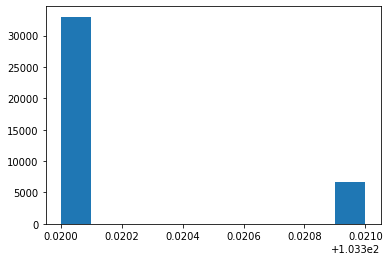

In [4]:
plt.hist(train_x['X_02'])
plt.show()


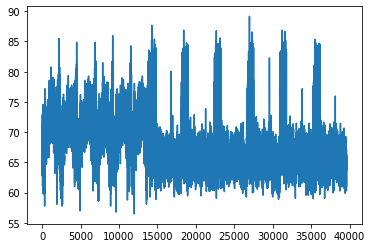

<Figure size 2160x360 with 0 Axes>

In [5]:
plt.plot(train_x['X_03'])
plt.figure(figsize=(30, 5))
plt.show()


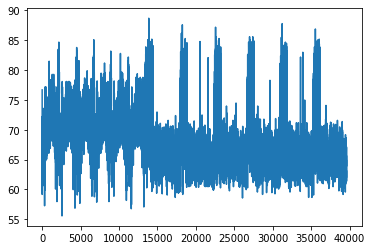

<Figure size 2160x360 with 0 Axes>

In [6]:
plt.plot(x_test['X_03'])
plt.figure(figsize=(30, 5))
plt.show()

In [7]:
print(train_x.index)

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            39597, 39598, 39599, 39600, 39601, 39602, 39603, 39604, 39605,
            39606],
           dtype='int64', length=39606)


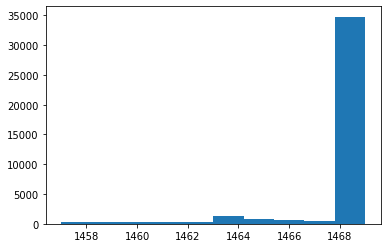

(1469, 1457)

In [8]:
train_x['X_60'] = train_x.index
x_test['X_60'] = x_test.index
plt.hist(train_x['X_46'])
plt.show()
train_x['X_46'].max(), train_x['X_46'].min()

In [9]:
train_x.shape

(39606, 53)

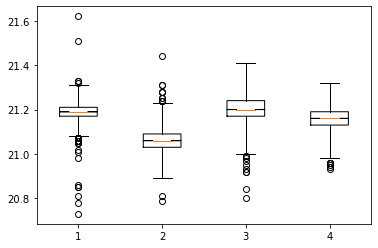

[array([21.17, 21.08]),
 array([21.21, 21.31]),
 array([21.03, 20.89]),
 array([21.09, 21.23]),
 array([21.17, 21.  ]),
 array([21.24, 21.41]),
 array([21.13, 20.98]),
 array([21.19, 21.32])]

In [10]:
box = plt.boxplot([train_x['X_41'],train_x['X_42'],train_x['X_43'],train_x['X_44']], notch=True, whis=2.5)
plt.show()
whiskers = [item.get_ydata() for item in box['whiskers']]
whiskers

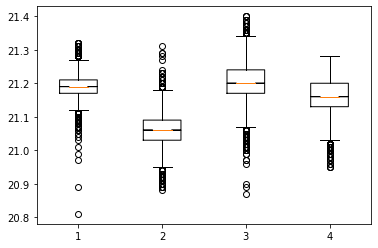

[array([21.17, 21.12]),
 array([21.21, 21.27]),
 array([21.03, 20.95]),
 array([21.09, 21.18]),
 array([21.17, 21.07]),
 array([21.24, 21.34]),
 array([21.13, 21.03]),
 array([21.2 , 21.28])]

In [11]:
box = plt.boxplot([x_test['X_41'],x_test['X_42'],x_test['X_43'],x_test['X_44']], notch=True, whis=1.5)
plt.show()
whiskers = [item.get_ydata() for item in box['whiskers']]
whiskers